In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Hypothesis Testing Introduction

- the task of determining the probability that a hypothesis is true
- typically, we define a null hypothesis and an alternative hypothesis; then, we determine the probability that the null hypothesis is true
- a p-value is a test statistic that can be regarded as evidence against the null hypothesis (for instance, we reject a null hypothesis if the p-value is smaller than a specified threshold or significance level or alpha value) -- the p-value is the probability of a model assuming that the null hypothesis is true
- 1-sample test: compare a sample against a number
- 2-sample test: compare two samples

## Case 1 -- Simulation under the null hypothesis using permutation sampling (2-sample test)

- null hypothesis: data is identically distributed between the two variables
- how likely is it to observe this data if the null hypothesis is true?
- we can scramble (permute the data) and divide it into 2 new samples and then check if there's any difference (in other words, we generate new data under the null hypothesis)

In [2]:
df = pd.read_csv('../datasets/iris/iris.csv')
x1 = df.loc[df['species'] == 'setosa', 'sepal_width'].values
x2 = df.loc[df['species'] == 'versicolor', 'sepal_width'].values

In [3]:
for d in (x1, x2):
    print('Mean:', np.mean(d))
    print('Std.Dev.:', np.std(d, ddof=1))

Mean: 3.428
Std.Dev.: 0.379064369096
Mean: 2.77
Std.Dev.: 0.313798323378


- the difference in means (our test statistic) of permuted samples should be zero if the null hypothesis is true

In [4]:
def generate_permutation_samples(sample1, sample2, seed=None):
    rng = np.random.RandomState(seed)
    sample = np.concatenate((sample1, sample2))
    sample_perm = rng.permutation(sample)
    sample1_perm = sample_perm[:sample1.shape[0]]
    sample2_perm = sample_perm[sample1.shape[0]:]
    return sample1_perm, sample2_perm

In [5]:
num_permutations = 1000

perm_mean_diffs = np.zeros(num_permutations)
for i in range(num_permutations):
    x1_perm, x2_perm = generate_permutation_samples(x1, x2, seed=123)
    perm_mean_diffs[i] = np.mean(x1_perm) - np.mean(x2_perm)

In [6]:
empirical_mean_diff = np.mean(x1) - np.mean(x2)
empirical_mean_diff

0.65799999999999947

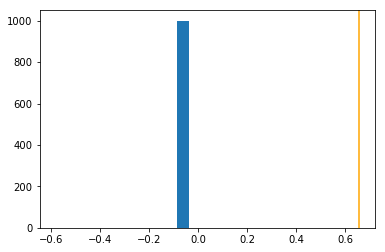

In [7]:
plt.hist(perm_mean_diffs, bins=20)
plt.axvline(empirical_mean_diff, color='orange')

In [8]:
p_value = np.sum(perm_mean_diffs >= empirical_mean_diff) / len(perm_mean_diffs)
print('P-value', p_value)

P-value 0.0


- the area under the histogram left (or right) to the vertical bar (difference observed in the original samples) is the p-value
- here, the area right to the vertical bar (i.e., values that are at least as extreme as the observed difference of the mean between the two samples) is 0.0, so we can conclude that the probability of observing this data (the difference between the means of the samples) or something more extreme is 0% likely if the null hypothesis was true (remember that the p-value is not the probability that the null hypothesis is true, though)
- thus, we can reject the null hypothesis (data is "statistically significantly different" from what we would expect to observe if the null hypothesis was true)

## Case 2 -- Simulation under the null hypothesis using bootstrapping (1-sample test)

In [9]:
df = pd.read_csv('../datasets/iris/iris.csv')
x1 = df.loc[df['species'] == 'setosa', 'sepal_width'].values
x1_mean = np.mean(x1)
x1_mean

3.4279999999999999

- our null hypothesis is that two variables, x1 and x2, have the same mean (not necessarily same distribution)
- assume we don't have a sample from x2, but we have its mean
- we set the significance level $\alpha=0.05$

In [10]:
x2_mean = 3.55

In [11]:
# 1) normalize x1 so that it has the same mean as x2
normed_x1 = x1 - np.mean(x1) + x2_mean

# 2) draw bootstrap replicates
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = rng.choice(x, size=x.shape[0], replace=True)
        # replicate is a general term for a statistic computed
        # from a bootstrap sample
        bootstrap_replicate = np.mean(boot_sample)
        sample_means[i] = bootstrap_replicate
    return sample_means

num_replicates = 1000
bs_replicates = bootstrap_means(x1, n_bootstrap_samples=num_replicates, seed=123)

# 3) compute p-value
p_value = np.sum(bs_replicates >= x2_mean) / num_replicates

print('p-value', p_value)

p-value 0.006


- at $\alpha=0.05$, we can reject the null hypothesis that the two variables are from the same distribtion